In [31]:
import cv2
import random
import os
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [32]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
!pip install tensorflow keras opencv-python-headless

### Processing RGB images: overlaying squares on the facial area in photos without masks


In [33]:
def process_image(image_path, square_size=10):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    original_img = img.copy()
    mask_regions = []

    for (x, y, w, h) in faces:
        mask_start_point = (x, y + h//2)
        mask_end_point = (x + w, y + h)
        mask_region = original_img[mask_start_point[1]:mask_end_point[1], mask_start_point[0]:mask_end_point[0]]
        mask_regions.append(mask_region)

        #cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

        for i in range(mask_start_point[1], mask_end_point[1], square_size):
            for j in range(mask_start_point[0], mask_end_point[0], square_size):
                img[i:i+square_size, j:j+square_size] = (0, 0, 0)

    return original_img, mask_regions, img

In [34]:
image_path = '/content/face/000058.jpg'

In [35]:
square_size = 10
original_img, mask_regions, processed_img = process_image(image_path, square_size)

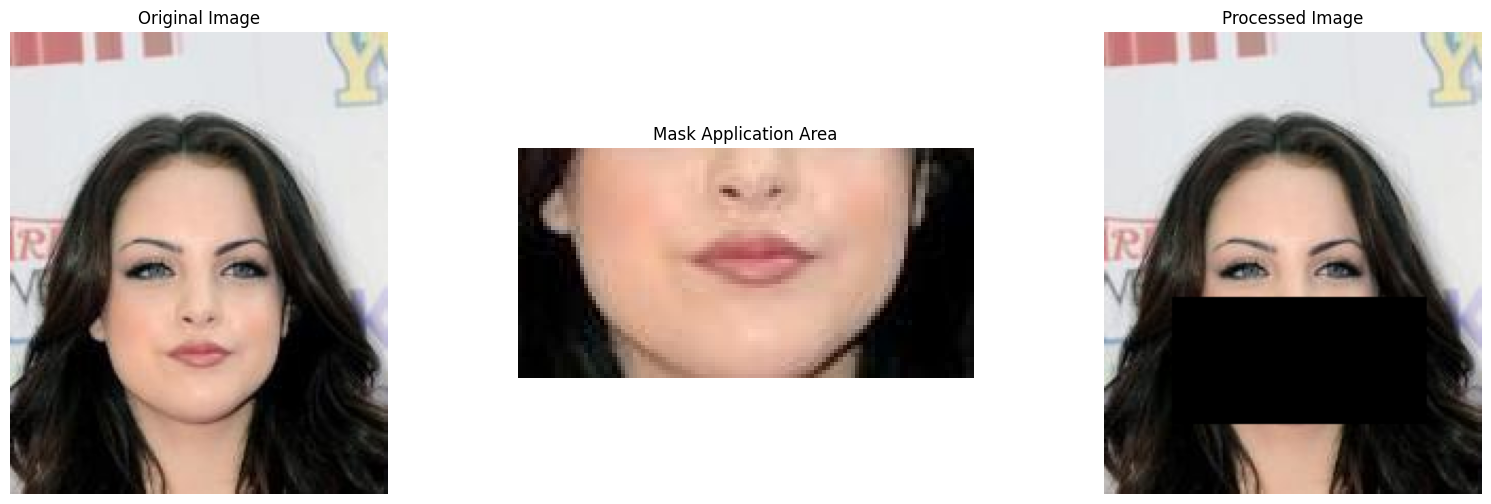

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
titles = ['Original Image', 'Mask Application Area', 'Processed Image']

axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].set_title(titles[0])
axes[0].axis('off')

if mask_regions:
    axes[1].imshow(cv2.cvtColor(mask_regions[0], cv2.COLOR_BGR2RGB))
    axes[1].set_title(titles[1])
    axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB))
axes[2].set_title(titles[2])
axes[2].axis('off')

plt.show()

In [37]:
def process_color_image(image_path, square_size=10):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    original_img = img.copy()
    mask_regions = []

    for (x, y, w, h) in faces:
        mask_start_point = (x, y + h//2)
        mask_end_point = (x + w, y + h)
        mask_region = original_img[mask_start_point[1]:mask_end_point[1], mask_start_point[0]:mask_end_point[0]]
        mask_regions.append(mask_region)

        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

        for i in range(mask_start_point[1], mask_end_point[1], square_size):
            for j in range(mask_start_point[0], mask_end_point[0], square_size):
                color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
                img[i:i+square_size, j:j+square_size] = color

    return original_img, mask_regions, img

    return original_img, mask_regions, img


In [38]:
square_size = 10
original_img2, mask_regions2, processed_img2 = process_color_image(image_path, square_size)

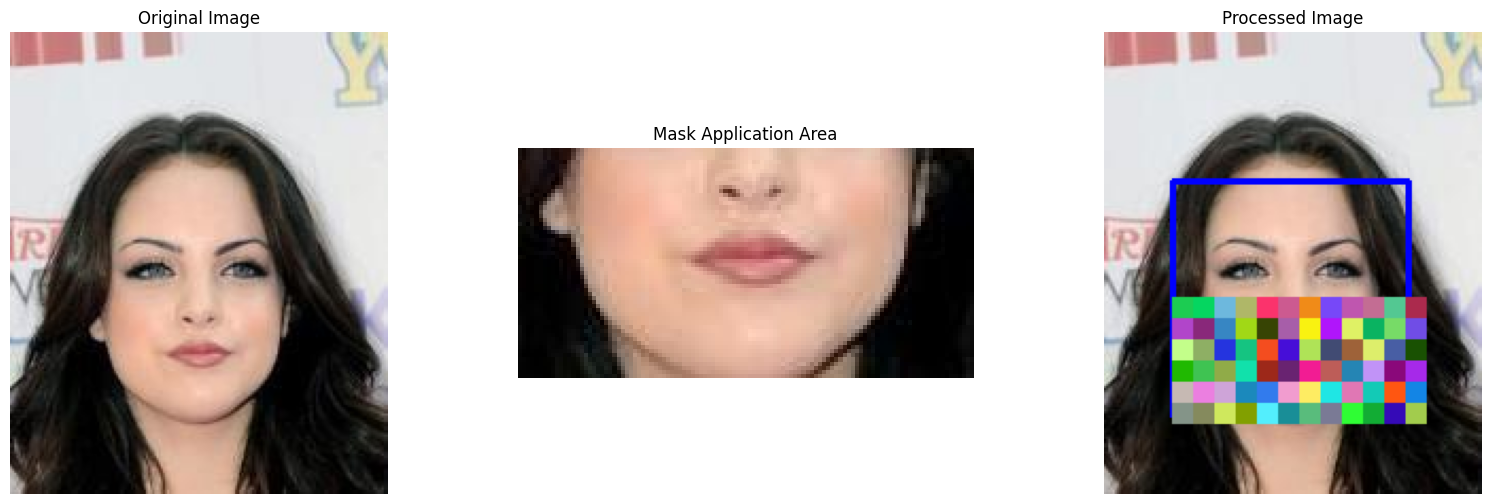

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
titles = ['Original Image', 'Mask Application Area', 'Processed Image']

axes[0].imshow(cv2.cvtColor(original_img2, cv2.COLOR_BGR2RGB))
axes[0].set_title(titles[0])
axes[0].axis('off')

if mask_regions:
    axes[1].imshow(cv2.cvtColor(mask_regions2[0], cv2.COLOR_BGR2RGB))
    axes[1].set_title(titles[1])
    axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(processed_img2, cv2.COLOR_BGR2RGB))
axes[2].set_title(titles[2])
axes[2].axis('off')

plt.show()

In [43]:
def process_image_shrink(image_path, square_size=10, shrink_side_px=15):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    original_img = img.copy()
    mask_regions = []

    for (x, y, w, h) in faces:
        mask_start_point = (x + shrink_side_px, y + h//2)
        mask_end_point = (x + w - shrink_side_px, y + h)

        mask_region = original_img[mask_start_point[1]:mask_end_point[1], mask_start_point[0]:mask_end_point[0]]
        mask_regions.append(mask_region)

        for i in range(mask_start_point[1], mask_end_point[1], square_size):
            for j in range(mask_start_point[0], mask_end_point[0], square_size):
                img[i:i+square_size, j:j+square_size] = (0, 0, 0)

    return original_img, mask_regions, img


In [44]:
square_size = 10
original_img3, mask_regions3, processed_img3 = process_image_shrink(image_path, square_size)

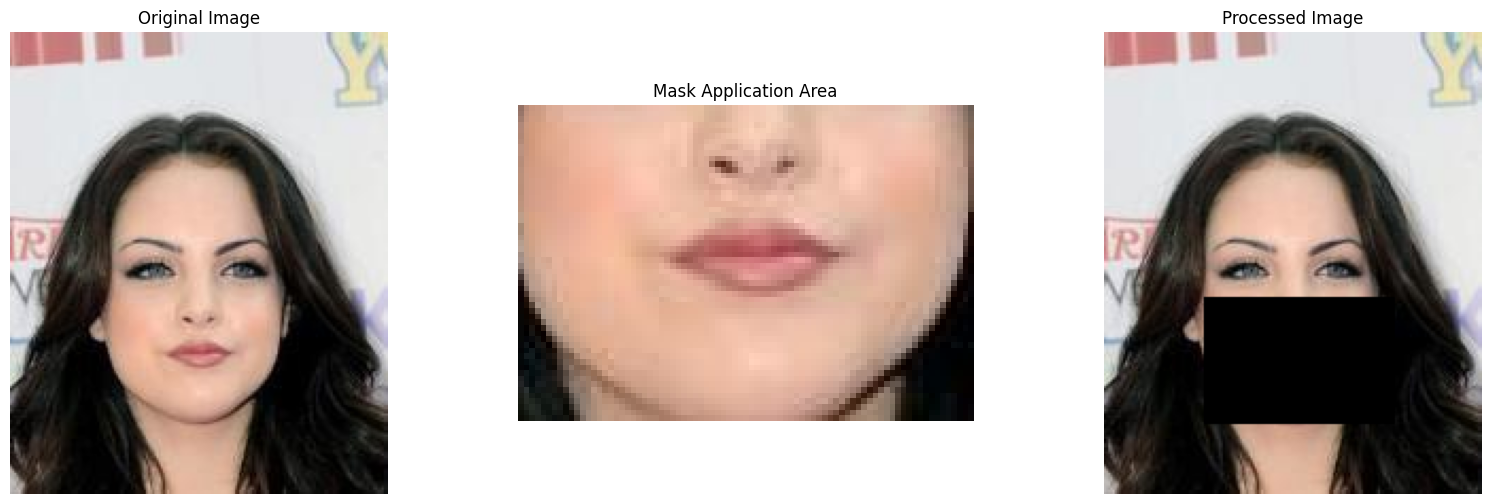

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
titles = ['Original Image', 'Mask Application Area', 'Processed Image']

axes[0].imshow(cv2.cvtColor(original_img3, cv2.COLOR_BGR2RGB))
axes[0].set_title(titles[0])
axes[0].axis('off')

if mask_regions:
    axes[1].imshow(cv2.cvtColor(mask_regions3[0], cv2.COLOR_BGR2RGB))
    axes[1].set_title(titles[1])
    axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(processed_img3, cv2.COLOR_BGR2RGB))
axes[2].set_title(titles[2])
axes[2].axis('off')

plt.show()

In [47]:
input_folder = '/content/face'
output_folder = '/content/saved_face'


if not os.path.exists(output_folder):
    os.makedirs(output_folder)


for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)
        original_img, mask_regions, processed_img = process_image_shrink(image_path, square_size=10)

        output_path = os.path.join(output_folder, 'processed_' + filename)
        cv2.imwrite(output_path, processed_img)

print("Images saved to:", output_folder)

Images saved to: /content/saved_face


____

###Processing thermographic images: overlaying squares on the facial area in photos with masks

In [ ]:
!pip install ultralytics

In [71]:
from ultralytics import YOLO
import cv2
import os
import numpy as np

In [89]:
source_folder = '/content/mask'
target_folder = '/content/saved_face'

Path(target_folder).mkdir(parents=True, exist_ok=True)

In [90]:
model = YOLO('best.pt')

In [102]:
square_size = 20

In [103]:
image_paths = [os.path.join(source_folder, file) for file in os.listdir(source_folder) if file.endswith(('.jpg', '.png'))]

In [106]:
results = model(image_paths, stream=True)

for result in results:
    img_path = result.path
    original_img = cv2.imread(img_path)
    img = original_img.copy()

    if result.boxes is not None:
        for box in result.boxes.xyxy:
            x1, y1, x2, y2 = box
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

            for i in range(y1, y2, square_size):
                for j in range(x1, x2, square_size):
                    img[i:i+square_size, j:j+square_size] = (0, 0, 0)

            #for i in range(y1, y2, square_size):
            #      for j in range(x1, x2, square_size):
            #          color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            #          img[i:i+square_size, j:j+square_size] = color

    modified_img_path = os.path.join('test', 'modified_' + os.path.basename(img_path))
    cv2.imwrite(modified_img_path, img)


0: 512x640 1 mask, 1: 512x640 1 mask, 2: 512x640 1 mask, 2090.7ms
Speed: 2.2ms preprocess, 696.9ms inference, 3.9ms postprocess per image at shape (1, 3, 512, 640)


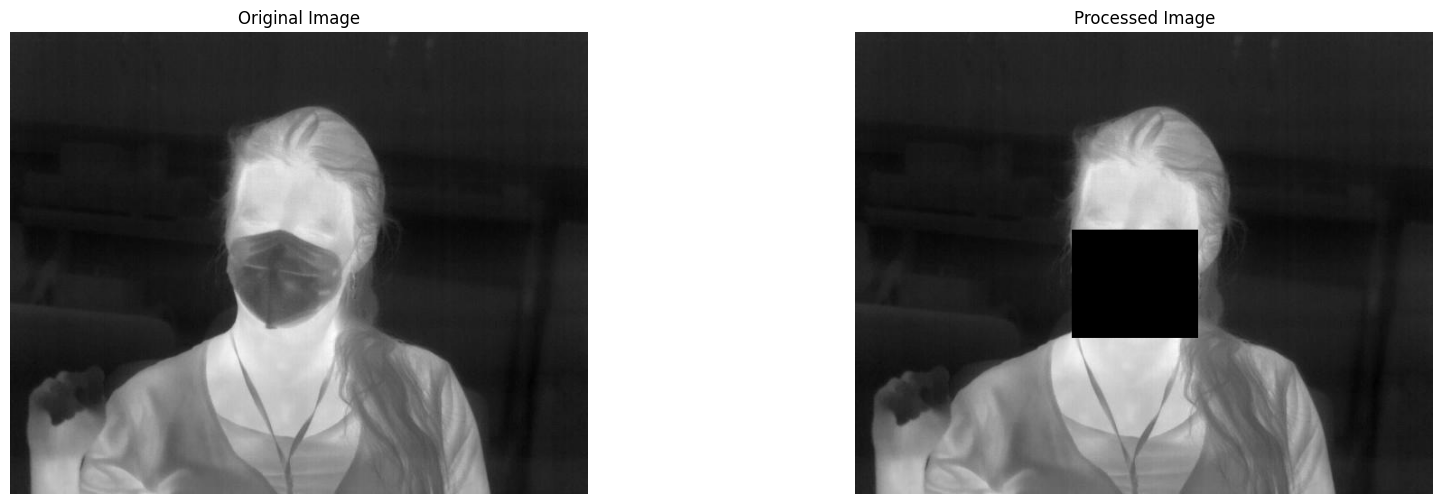

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
titles = ['Original Image', 'Processed Image']

axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].set_title(titles[0])
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].set_title(titles[1])
axes[1].axis('off')

plt.show()

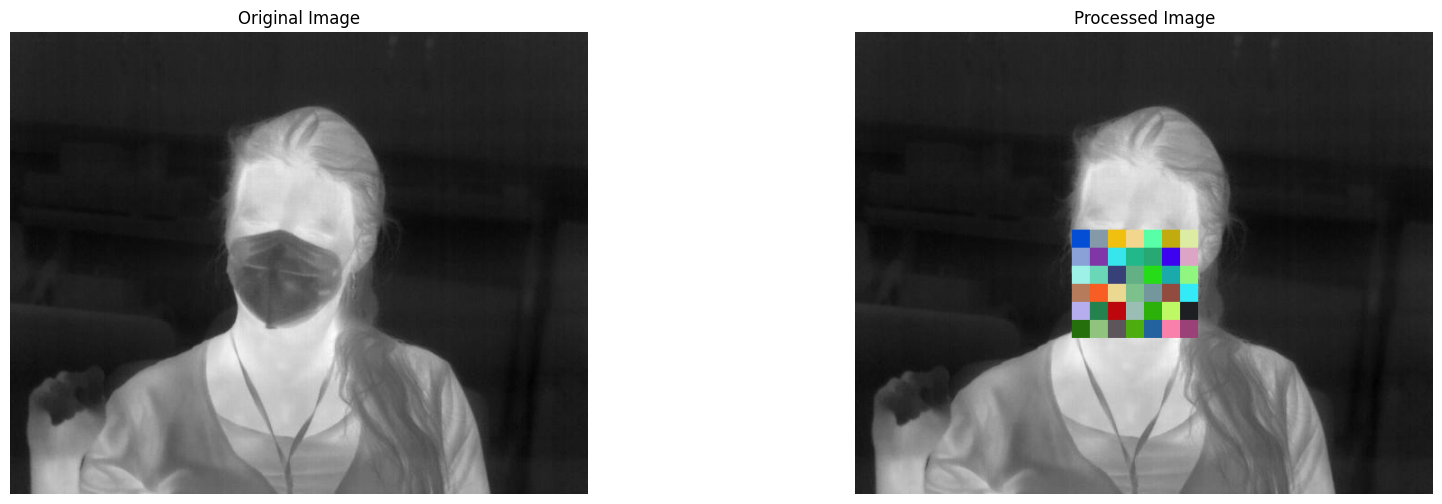

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
titles = ['Original Image', 'Processed Image']

axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].set_title(titles[0])
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[1].set_title(titles[1])
axes[1].axis('off')

plt.show()